In [1]:
# IMPORT LIBRARIES

import sys
# Add parent directory to path to import file_paths module
sys.path.insert(0, '..')
import file_paths
import helper_functions

import matplotlib.pyplot as plt
import eelbrain


In [2]:
# Load envelope TRFs for all subjects
trfs = []
r_values = []

SUBJECTS = helper_functions.get_subjects()

for subject in SUBJECTS:
    attended_trf_path = file_paths.TRF_DIR / subject / f'{subject}_attended_trf.pickle'
    unattended_trf_path = file_paths.TRF_DIR / subject / f'{subject}_unattended_trf.pickle'

    if attended_trf_path.exists() and unattended_trf_path.exists():
        trf_attended = eelbrain.load.unpickle(attended_trf_path)
        trf_unattended = eelbrain.load.unpickle(unattended_trf_path)
        trfs.append((trf_attended, trf_unattended))
        
        r_values.append((trf_attended.r, trf_unattended.r))
        # Note that r does not take into account the model’s ability to predict the magnitude of the response, only its shape; for a measure that reflects both, consider using proportion_explained.

        print(f"Loaded TRFs for {subject}")
    else:
        print(f"TRF files for {subject} not found, skipping.")
        

print(f"Loaded TRFs for {len(trfs)} subjects")

Loaded TRFs for S1
Loaded TRFs for S2
Loaded TRFs for S3
Loaded TRFs for S4
Loaded TRFs for S5
Loaded TRFs for S6
Loaded TRFs for S7
Loaded TRFs for S8
Loaded TRFs for S9
Loaded TRFs for S10
Loaded TRFs for S11
Loaded TRFs for S12
Loaded TRFs for S13
Loaded TRFs for S14
Loaded TRFs for S15
Loaded TRFs for S16
Loaded TRFs for S17
Loaded TRFs for S18
Loaded TRFs for 18 subjects


In [3]:
attended_all = []
unattended_all = []

for subject in trfs:
    attended = subject[0].h_scaled      # DO NOT mean over sensors
    unattended = subject[1].h_scaled

    attended_all.append(attended)
    unattended_all.append(unattended)

attended_nd = eelbrain.combine(attended_all)
unattended_nd = eelbrain.combine(unattended_all)

In [4]:
result = eelbrain.testnd.TTestRelated(
    attended_nd,
    unattended_nd,
    tail=0,          # two-sided
    pmin=0.05,       # cluster-forming threshold
    samples=2000     # permutations
)
result

Permutation test:   0%|          | 0/2000 [00:00<?, ? permutations/s]

<TTestRelated 'attended', 'unattended' (n=18), samples=2000, pmin=0.05, 340 clusters, p < .001>

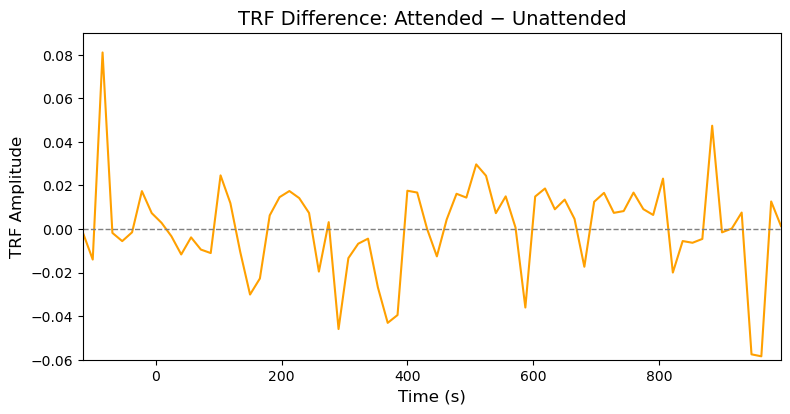

In [5]:
diff_mean = (attended_nd - unattended_nd).mean('sensor')

p = eelbrain.plot.UTS(diff_mean)
# UTS returns a plot object with p.axes as a list of axes
ax = p.axes[0]  # pick the first axis

# Set labels and title
ax.set_title('TRF Difference: Attended − Unattended', fontsize=14)
ax.set_xlabel('Time (s)', fontsize=12)
ax.set_ylabel('TRF Amplitude', fontsize=12)

# Add horizontal zero line
ax.axhline(0, color='gray', linestyle='--', linewidth=1)

# Optional: show the plot (usually automatically shown in notebooks)
plt.show()